# IMPORT LIBRARIES AND FILES

In [1]:
# %pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from geopandas.tools import sjoin

In [2]:
# Read the data from the Geodatabase file
fire_df = gpd.read_file('California_Fire_Perimeters_(all).geojson')

# Load all the attribute tables
agency_code = pd.read_excel('agency_code.xlsx')
cause_code = pd.read_excel('cause_code.xlsx')
collection_method = pd.read_excel('collection_method.xlsx')
type_of_fire = pd.read_excel('type_of_fire.xlsx')

# DATA CLEANING

In [3]:
# Attribute tables information
agency_code.info()
cause_code.info()
collection_method.info()
type_of_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AGENCY       12 non-null     object
 1   AGENCY_NAME  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CAUSE          19 non-null     int64 
 1   CAUSE_OF_FIRE  19 non-null     object
dtypes: int64(1), object(1)
memory usage: 436.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   C_METHOD           8 non-null      int64 
 1   COLLECTION_METHOD  8 non-null      object
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes
<class 'pandas.co

In [4]:
# Let's check out our dataset
fire_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21926 entries, 0 to 21925
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID        21926 non-null  int64   
 1   YEAR_           21858 non-null  object  
 2   STATE           21926 non-null  object  
 3   AGENCY          21921 non-null  object  
 4   UNIT_ID         21909 non-null  object  
 5   FIRE_NAME       21912 non-null  object  
 6   INC_NUM         21279 non-null  object  
 7   ALARM_DATE      16578 non-null  object  
 8   CONT_DATE       9346 non-null   object  
 9   CAUSE           21902 non-null  float64 
 10  COMMENTS        19853 non-null  object  
 11  GIS_ACRES       21926 non-null  float64 
 12  C_METHOD        9805 non-null   float64 
 13  OBJECTIVE       21732 non-null  float64 
 14  FIRE_NUM        17643 non-null  object  
 15  COMPLEX_NAME    577 non-null    object  
 16  COMPLEX_INCNUM  536 non-null    object  
 17  IRWI

In [5]:
# We can pick out the useful columns only
df = fire_df[['YEAR_', 'STATE', 'AGENCY','FIRE_NAME','INC_NUM','ALARM_DATE','CONT_DATE',
                      'CAUSE','GIS_ACRES','C_METHOD','OBJECTIVE','geometry']]
df.head(5)

,YEAR_,STATE,AGENCY,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,GIS_ACRES,C_METHOD,OBJECTIVE,geometry
0,2020,CA,CDF,NELSON,00013212,2020-06-18T00:00:00+00:00,2020-06-23T00:00:00+00:00,11.0,109.602280,1.0,1.0,"MULTIPOLYGON (((-121.34842 38.88999, -121.3483..."
1,2020,CA,CDF,AMORUSO,00011799,2020-06-01T00:00:00+00:00,2020-06-04T00:00:00+00:00,2.0,685.585020,1.0,1.0,"MULTIPOLYGON (((-121.35276 38.82039, -121.3526..."
2,2020,CA,CDF,ATHENS,00018493,2020-08-10T00:00:00+00:00,2020-08-11T00:00:00+00:00,14.0,27.300480,1.0,1.0,"MULTIPOLYGON (((-121.33335 38.84558, -121.3331..."
3,2020,CA,CDF,FLEMING,00007619,2020-03-31T00:00:00+00:00,2020-04-01T00:00:00+00:00,9.0,12.931545,1.0,1.0,"MULTIPOLYGON (((-121.27318 38.96308, -121.2730..."
4,2020,CA,CDF,MELANESE,00008471,2020-04-14T00:00:00+00:00,2020-04-19T00:00:00+00:00,18.0,10.315964,1.0,1.0,"MULTIPOLYGON (((-121.30067 39.48714, -121.3004..."


In [6]:
# We only want wildfires in CA
df = df[df['STATE']=='CA']
df['STATE'].unique()

array(['CA'], dtype=object)

In [7]:
# Apply attribute tables onto our dataset
df = pd.merge(df, agency_code, on = 'AGENCY', how = 'left')
df = pd.merge(df, cause_code, on = 'CAUSE', how = 'left')
df = pd.merge(df, collection_method, on = 'C_METHOD', how = 'left')
df = pd.merge(df, type_of_fire, on = 'OBJECTIVE', how = 'left')
df.head(2)

,YEAR_,STATE,AGENCY,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,GIS_ACRES,C_METHOD,OBJECTIVE,geometry,AGENCY_NAME,CAUSE_OF_FIRE,COLLECTION_METHOD,TYPE_OF_FIRE
0,2020,CA,CDF,NELSON,00013212,2020-06-18T00:00:00+00:00,2020-06-23T00:00:00+00:00,11.0,109.60228,1.0,1.0,"MULTIPOLYGON (((-121.34842 38.88999, -121.3483...",California Department of Forestry and Fire Pro...,Power Line,GPS Ground,Suppression (Wildfire)
1,2020,CA,CDF,AMORUSO,00011799,2020-06-01T00:00:00+00:00,2020-06-04T00:00:00+00:00,2.0,685.58502,1.0,1.0,"MULTIPOLYGON (((-121.35276 38.82039, -121.3526...",California Department of Forestry and Fire Pro...,Equipment Use,GPS Ground,Suppression (Wildfire)


In [8]:
# Drop unneccessary columns and rename them
df.drop(columns=['AGENCY','STATE','C_METHOD','OBJECTIVE','CAUSE'], inplace=True)
df = df[['YEAR_','ALARM_DATE','CONT_DATE','FIRE_NAME','INC_NUM','GIS_ACRES','AGENCY_NAME',
         'CAUSE_OF_FIRE','TYPE_OF_FIRE','COLLECTION_METHOD','geometry']]
df.columns = ['YEAR','ALARM_DATE','CONT_DATE','FIRE_NAME','INC_NUM','BURNED_ACRES','AGENCY',
              'CAUSE','TYPE_OF_FIRE','COLLECTION_METHOD','GEOMETRY']
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21910 entries, 0 to 21909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   YEAR               21842 non-null  object  
 1   ALARM_DATE         16564 non-null  object  
 2   CONT_DATE          9335 non-null   object  
 3   FIRE_NAME          21896 non-null  object  
 4   INC_NUM            21263 non-null  object  
 5   BURNED_ACRES       21910 non-null  float64 
 6   AGENCY             21905 non-null  object  
 7   CAUSE              21887 non-null  object  
 8   TYPE_OF_FIRE       21717 non-null  object  
 9   COLLECTION_METHOD  9793 non-null   object  
 10  GEOMETRY           21910 non-null  geometry
dtypes: float64(1), geometry(1), object(9)
memory usage: 2.0+ MB


In [9]:
# Find NULL percentages per column
null_percentage = df.isna().sum()/df.shape[0] * 100
print(null_percentage)

YEAR                  0.310361
ALARM_DATE           24.399817
CONT_DATE            57.393884
FIRE_NAME             0.063898
INC_NUM               2.952990
BURNED_ACRES          0.000000
AGENCY                0.022821
CAUSE                 0.104975
TYPE_OF_FIRE          0.880876
COLLECTION_METHOD    55.303514
GEOMETRY              0.000000
dtype: float64


- We can drop NULL values in YEAR because they are only 0.3% of our data. We can't use alarm date and containment date to fix them because there are even more amount of NULLs in these two columns. We want to look at CA wildfires throughout the years so missing YEAR values is not good.
- We can replace NULLs in INC_NUM, FIRE_NAME, AGENCY, CAUSE, TYPE_OF_FIRE, COLLECTION_METHOD with 'Unknown' for now.
- We then change ALARM_DATE and CONT_DATE into datetime and replace NULLs with 1900-01-01 values

In [10]:
# Adjust NULLs accordingly
df.dropna(subset=['YEAR'], inplace=True)
df[['INC_NUM','FIRE_NAME','AGENCY','CAUSE','TYPE_OF_FIRE','COLLECTION_METHOD']] = df[['INC_NUM','FIRE_NAME','AGENCY','CAUSE','TYPE_OF_FIRE','COLLECTION_METHOD']].fillna('Unknown')

# Convert 'ALARM_DATE' and 'CONT_DATE' columns to datetime format, replace null values with 1900-01-01
df['ALARM_DATE'] = df['ALARM_DATE'].fillna(pd.Timestamp("19000101"))
df['CONT_DATE'] = df['CONT_DATE'].fillna(pd.Timestamp("19000101"))

df['ALARM_DATE'] = pd.to_datetime(df['ALARM_DATE'], errors='coerce')
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'], errors='coerce')

- Let's check each column for some anomalies

In [11]:
# For column YEAR
df['YEAR'].unique() # there is value "", we need to drop that too

# Drop ""
df = df[df['YEAR'] != '']

# We only interesting in the past 100 years of data 1922-2022
df['YEAR'] = df['YEAR'].astype('int')
df = df[df['YEAR'] >= 1922]

# For column FIRE_NAME
df['FIRE_NAME'].unique() # there are a lot of " " and N/A, let's change them to 'Unknown'
df.loc[df['FIRE_NAME'].isin([""," ","N/A"]), 'FIRE_NAME'] = 'Unknown'

# For column INC_NUM
df['INC_NUM'].unique()  # there are a lot of " ", let's change them to 'Unknown'
df.loc[df['INC_NUM'].isin([""," ","N/A"]), 'INC_NUM'] = 'Unknown'

# For column BURNED_ACRES
df['BURNED_ACRES'].unique()  # this column has no anomalies so no need to change anything

# For column AGENCY
df['AGENCY'].unique()  # this column has no anomalies so no need to change anything

# For column CAUSE
df['CAUSE'].unique()  # we can change 'Unknown' to 'Unknown/Unidentified' to be uniform
df.loc[df['CAUSE'].isin(["Unknown"]), 'CAUSE'] = 'Unknown/Unidentified'

# For column TYPE_OF_FIRE
df['TYPE_OF_FIRE'].unique()  # this column has no anomalies so no need to change anything

# For column COLLECTION_METHOD
df['COLLECTION_METHOD'].unique()  # this column has no anomalies so no need to change anything

array(['GPS Ground', 'Infrared', 'Mixed Collection Methods',
       'Other Imagery', 'GPS Air', 'Hand Drawn', 'Unknown',
       'Photo Interpretation'], dtype=object)

- There are a few YEAR that do not match the year values on ALARM_DATE, let's look at them

In [12]:
# Extract the year value from alarm date
df['check_year'] = df['ALARM_DATE'].dt.year
# Filter only the legitimate ones
check_year_df = df[df['ALARM_DATE'].dt.year > 1900]
# Create a boolean mask for different values
mask = check_year_df['YEAR'] != check_year_df['check_year']
# Filter the DataFrame using the mask
check_year_df[mask]

,YEAR,ALARM_DATE,CONT_DATE,FIRE_NAME,INC_NUM,BURNED_ACRES,AGENCY,CAUSE,TYPE_OF_FIRE,COLLECTION_METHOD,GEOMETRY,check_year
352,2020,2021-12-30 00:00:00+00:00,2021-12-31 00:00:00+00:00,CREEK 5,00020846,3052.172600,Department of Defense,Unknown/Unidentified,Suppression (Wildfire),Unknown,"MULTIPOLYGON (((-117.27316 33.40427, -117.2730...",2021.0
421,2020,2021-01-14 00:00:00+00:00,2021-01-15 00:00:00+00:00,ERBES,00004124,26.548506,Contract Counties,Unknown/Unidentified,Suppression (Wildfire),Mixed Collection Methods,"MULTIPOLYGON (((-118.83857 34.22940, -118.8386...",2021.0
11142,2000,2003-06-20 00:00:00+00:00,1900-01-01 00:00:00+00:00,RIO,00006257,24.935143,California Department of Forestry and Fire Pro...,Unknown/Unidentified,Suppression (Wildfire),Unknown,"MULTIPOLYGON (((-118.77650 36.12482, -118.7764...",2003.0
11534,1981,1980-12-26 00:00:00+00:00,1981-01-07 00:00:00+00:00,DUFF CREEK,00000000,528.587770,United States Forest Service,Debris,Suppression (Wildfire),Unknown,"MULTIPOLYGON (((-119.19258 37.01760, -119.1926...",1980.0
12297,1958,1957-07-02 00:00:00+00:00,1900-01-01 00:00:00+00:00,DAM,00000000,147.494740,United States Forest Service,Unknown/Unidentified,Suppression (Wildfire),Unknown,"MULTIPOLYGON (((-117.67215 34.15519, -117.6730...",1957.0
14386,2003,2002-02-21 00:00:00+00:00,2002-02-21 00:00:00+00:00,UMBRA,00000000,2.778280,Department of Defense,Power Line,Suppression (Wildfire),GPS Ground,"MULTIPOLYGON (((-120.57893 34.78931, -120.5789...",2002.0
15323,1993,1994-09-24 00:00:00+00:00,1994-09-24 00:00:00+00:00,MARINE,00000000,3.972971,Department of Defense,Equipment Use,Suppression (Wildfire),Other Imagery,"MULTIPOLYGON (((-120.54213 34.77737, -120.5421...",1994.0
15358,1995,1997-08-15 00:00:00+00:00,1997-08-15 00:00:00+00:00,SLC-6,00000717,2.177445,Department of Defense,Miscellaneous,Suppression (Wildfire),Other Imagery,"MULTIPOLYGON (((-120.62427 34.58077, -120.6242...",1997.0
16265,1978,1979-08-08 00:00:00+00:00,1978-11-10 00:00:00+00:00,KIBBIE,Unknown,227.878360,United States Forest Service,Lightning,Suppression (Wildfire),Hand Drawn,"MULTIPOLYGON (((-119.86228 38.06525, -119.8622...",1979.0
16607,2008,2007-10-07 00:00:00+00:00,2007-10-07 00:00:00+00:00,FRASIER,007697,16.854744,California Department of Forestry and Fire Pro...,Vehicle,Suppression (Wildfire),GPS Ground,"MULTIPOLYGON (((-120.81792 35.70668, -120.8178...",2007.0


In [13]:
# Create function to replace YEAR with check_year using the ALARM_DATE
def correcting_year(row):
    if row['YEAR'] != row['check_year'] and row['ALARM_DATE'].year > 1900:
        row['YEAR'] = row['check_year']
    return row

# Apply function to each row and update the DataFrame
df = df.apply(correcting_year, axis=1)
df = df.drop(columns='check_year')

- We have finished cleaning the dataset for CA forest fires from 1922 to 2022. We now can join with the county boundary geojson file.

In [ ]:
# Join our geojson file with the county boundary geojson to find the county name for each fire, and drop the unneccessary columns
gdf = gpd.GeoDataFrame(df, geometry='GEOMETRY')
counties = gpd.read_file('California_County_Boundaries.geojson')
joined_gdf = sjoin(gdf, counties, how='left')
joined_gdf = joined_gdf.drop(columns=['index_right','OBJECTID','COUNTY_ABBREV','COUNTY_NUM','COUNTY_CODE','COUNTY_FIPS',
                                        'ISLAND','GlobalID','SHAPE_Length','SHAPE_Area'])
# Let's check if COUNTY_NAME has no anomalies
joined_gdf['COUNTY_NAME'].unique() 

# This dataframe is good to use, we can save it in .csv file
joined_gdf.to_csv('CA_fires.csv', index=False)

In [49]:
# Check out our dataset
joined_gdf.info()
joined_gdf.sample(5)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21151 entries, 0 to 21909
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   YEAR               21151 non-null  float64            
 1   ALARM_DATE         21150 non-null  datetime64[ns, UTC]
 2   CONT_DATE          21150 non-null  datetime64[ns, UTC]
 3   FIRE_NAME          21151 non-null  object             
 4   INC_NUM            21151 non-null  object             
 5   BURNED_ACRES       21151 non-null  float64            
 6   AGENCY             21151 non-null  object             
 7   CAUSE              21151 non-null  object             
 8   TYPE_OF_FIRE       21151 non-null  object             
 9   COLLECTION_METHOD  21151 non-null  object             
 10  GEOMETRY           21151 non-null  geometry           
 11  COUNTY_NAME        21151 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(2),

,YEAR,ALARM_DATE,CONT_DATE,FIRE_NAME,INC_NUM,BURNED_ACRES,AGENCY,CAUSE,TYPE_OF_FIRE,COLLECTION_METHOD,GEOMETRY,COUNTY_NAME
12910,2004.0,2004-05-30 00:00:00+00:00,2004-05-30 00:00:00+00:00,HWY166,00003897,65.160332,Contract Counties,Vehicle,Suppression (Wildfire),Hand Drawn,"MULTIPOLYGON (((-119.50552 34.89732, -119.5039...",San Luis Obispo
14064,1991.0,1900-01-01 00:00:00+00:00,1900-01-01 00:00:00+00:00,Unknown,00000000,91.796799,United States Forest Service,Unknown/Unidentified,Suppression (Wildfire),Unknown,"MULTIPOLYGON (((-116.80868 33.89453, -116.8106...",Riverside
1189,1945.0,1945-09-15 00:00:00+00:00,1900-01-01 00:00:00+00:00,LITTLE CHARLEY CREEK,00000000,1444.138900,California Department of Forestry and Fire Pro...,Unknown/Unidentified,Suppression (Wildfire),Unknown,"MULTIPOLYGON (((-123.67014 39.70422, -123.6702...",Mendocino
15576,1981.0,1981-07-15 00:00:00+00:00,1981-07-15 00:00:00+00:00,ADIN PASS,00000000,266.093200,United States Forest Service,Miscellaneous,Suppression (Wildfire),Unknown,"MULTIPOLYGON (((-120.90149 41.34182, -120.9007...",Modoc
10283,1963.0,1963-07-12 00:00:00+00:00,1900-01-01 00:00:00+00:00,SPORT,00000000,2.987333,United States Forest Service,Vehicle,Suppression (Wildfire),Unknown,"MULTIPOLYGON (((-123.45613 40.41947, -123.4562...",Trinity


# EXPLORATORY DATA ANALYSIS


## 1.   Trends of wildfires through the years

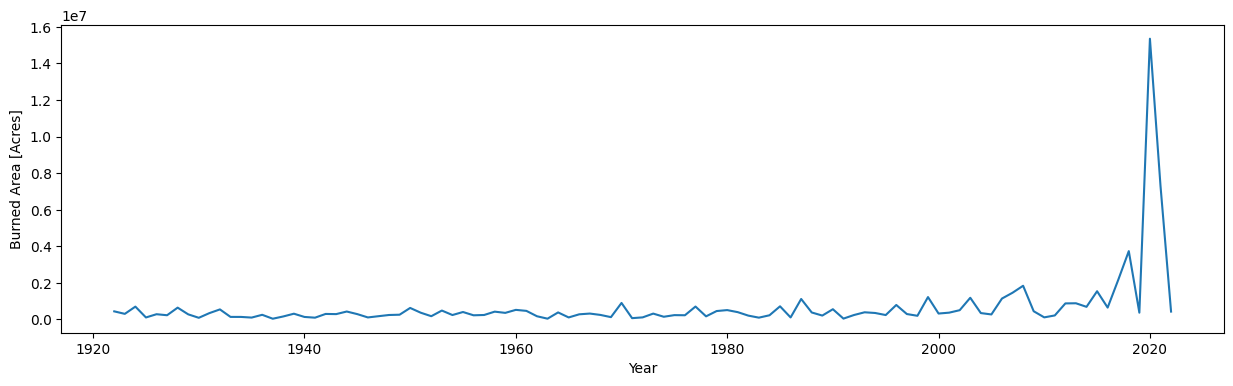

In [50]:
# Filter only wildfires
wildfire_df = joined_gdf[joined_gdf['TYPE_OF_FIRE']=='Suppression (Wildfire)']

# Find the total burned wildfire areas through the years
total_area = wildfire_df.groupby('YEAR')['BURNED_ACRES'].sum().reset_index()

# Plot the area burned on line plot
plt.figure(figsize=(15,4))
sns.lineplot(data=total_area, y='BURNED_ACRES', x='YEAR')
plt.xlabel('Year')
plt.ylabel('Burned Area [Acres]')
plt.show()

- The burned area in 2020 peaked suddenly, let's exclude after year 2020 to see how the previous fires were trending.

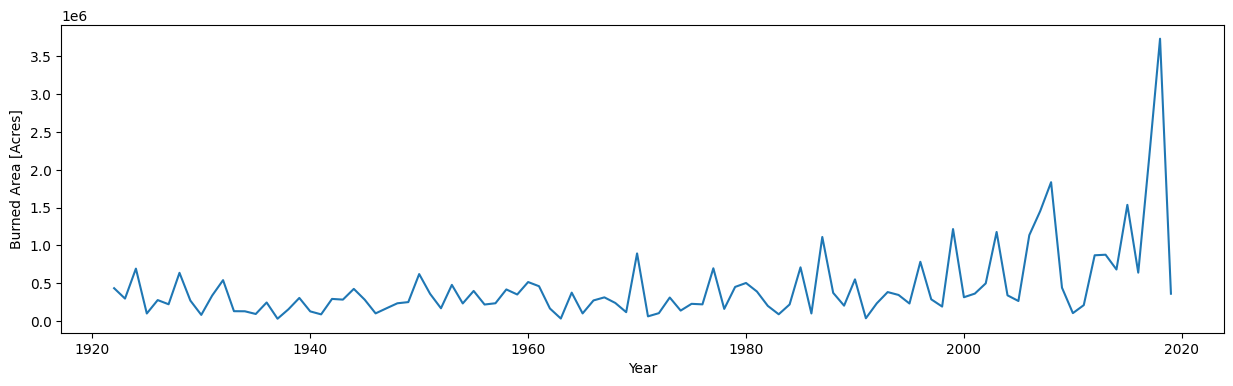

In [51]:
# Filter out the year 2020
before_2020 = wildfire_df[wildfire_df['YEAR'] < 2020]

# Find the total burned wildfire areas through the years
total_area_before_2020 = before_2020.groupby('YEAR')['BURNED_ACRES'].sum().reset_index()

# Plot the area burned on line plot
plt.figure(figsize=(15,4))
sns.lineplot(data=total_area_before_2020 , y='BURNED_ACRES', x='YEAR')
plt.xlabel('Year')
plt.ylabel('Burned Area [Acres]')
plt.show()

- The extent of burned areas in wildfires shows a slight increase each year, but the numbers fluctuate unpredictably, making it challenging to determine a consistent trend of worsening wildfires over time.
- Now, let's examine the distribution of wildfires on a monthly basis.

In [52]:
# Filter out the valid 'ALARM_DATE' 
m_df = wildfire_df[wildfire_df['ALARM_DATE'].dt.year > 1900].copy()

# Add a start_month for each fire
m_df['START_MONTH'] = m_df['ALARM_DATE'].dt.month

# Groupby months by number of fires and by total burned areas
monthly_df = m_df.groupby('START_MONTH')['INC_NUM'].count().reset_index()
monthly_df.columns = ['START_MONTH','NUM_OF_FIRES']
burned_monthly = m_df.groupby('START_MONTH')['BURNED_ACRES'].sum().reset_index()


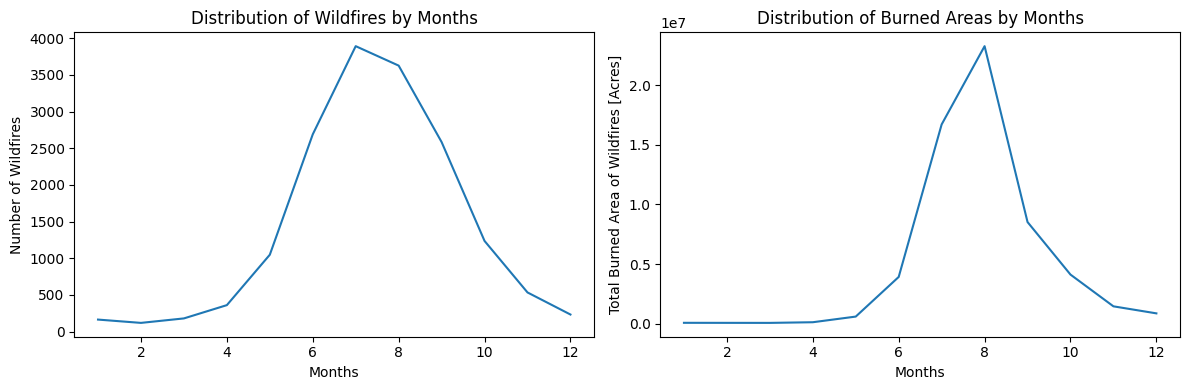

In [53]:
# Set the figure size and create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the monthly distribution of wildfires
sns.lineplot(data=monthly_df, x='START_MONTH', y='NUM_OF_FIRES', ax=axes[0])
axes[0].set_title('Distribution of Wildfires by Months')
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Number of Wildfires')

# Plot the monthly burned area distribution
sns.lineplot(data=burned_monthly, x='START_MONTH', y='BURNED_ACRES', ax=axes[1])
axes[1].set_title('Distribution of Burned Areas by Months')
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Total Burned Area of Wildfires [Acres]')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()

- CA peak wildfire times are between June and October when it is usually the hottest and driest.

## 2.   Trends of wildfires by their causes

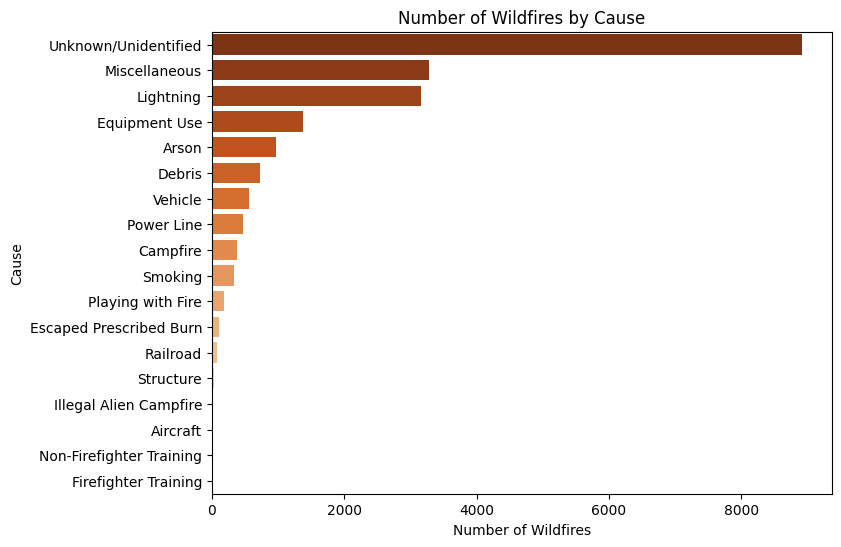

In [54]:
# Groupby fire's causes
cause_df = wildfire_df.groupby('CAUSE')['INC_NUM'].count().sort_values(ascending=False).reset_index()
cause_df.columns = ['CAUSE', 'NUM_OF_FIRES']

# Set the figure size
plt.figure(figsize=(8, 6))

# Define the color palette
colors = sns.color_palette("Oranges_r", len(cause_df))

# Create the horizontal bar plot with custom colors
sns.barplot(data=cause_df, x='NUM_OF_FIRES', y='CAUSE', palette=colors)

# Set the plot title and labels
plt.title('Number of Wildfires by Cause')
plt.xlabel('Number of Wildfires')
plt.ylabel('Cause')

# Display the plot
plt.show()

- "Unknown/Unidentified" is the top wildfire's cause in CA, followed by "Miscellaneous" and "Lightning"

In [55]:
# Groupby fire's causes and reshape data into pivot table format 
# where the 'CAUSE' values become columns, and the 'START_MONTH' values become the index.
cause_monthly = m_df.groupby(['START_MONTH', 'CAUSE'])['INC_NUM'].count().unstack().fillna(0)
cause_monthly

CAUSE,Aircraft,Arson,Campfire,Debris,Equipment Use,Escaped Prescribed Burn,Firefighter Training,Illegal Alien Campfire,Lightning,Miscellaneous,Non-Firefighter Training,Playing with Fire,Power Line,Railroad,Smoking,Structure,Unknown/Unidentified,Vehicle
START_MONTH,,,,,,,,,,,,,,,,,,
1,0.0,2.0,6.0,33.0,5.0,3.0,0.0,0.0,3.0,19.0,2.0,1.0,9.0,0.0,2.0,2.0,76.0,1.0
2,0.0,3.0,2.0,22.0,6.0,10.0,0.0,0.0,2.0,16.0,0.0,1.0,6.0,1.0,0.0,0.0,48.0,2.0
3,1.0,11.0,10.0,36.0,2.0,12.0,0.0,0.0,6.0,28.0,0.0,2.0,7.0,0.0,5.0,0.0,56.0,4.0
4,0.0,12.0,16.0,72.0,26.0,10.0,0.0,0.0,15.0,50.0,0.0,9.0,16.0,2.0,8.0,0.0,115.0,10.0
5,0.0,45.0,25.0,73.0,151.0,5.0,0.0,3.0,66.0,149.0,2.0,8.0,53.0,8.0,23.0,1.0,394.0,42.0
6,2.0,173.0,63.0,64.0,277.0,6.0,0.0,3.0,431.0,302.0,4.0,35.0,97.0,9.0,26.0,8.0,1083.0,106.0
7,4.0,217.0,72.0,53.0,323.0,9.0,0.0,5.0,803.0,409.0,2.0,66.0,80.0,28.0,76.0,9.0,1588.0,147.0
8,1.0,223.0,81.0,89.0,266.0,10.0,2.0,2.0,935.0,384.0,0.0,37.0,56.0,17.0,81.0,3.0,1336.0,103.0
9,4.0,178.0,55.0,75.0,167.0,12.0,0.0,2.0,416.0,294.0,0.0,17.0,63.0,8.0,82.0,2.0,1133.0,76.0


<Figure size 2200x700 with 0 Axes>

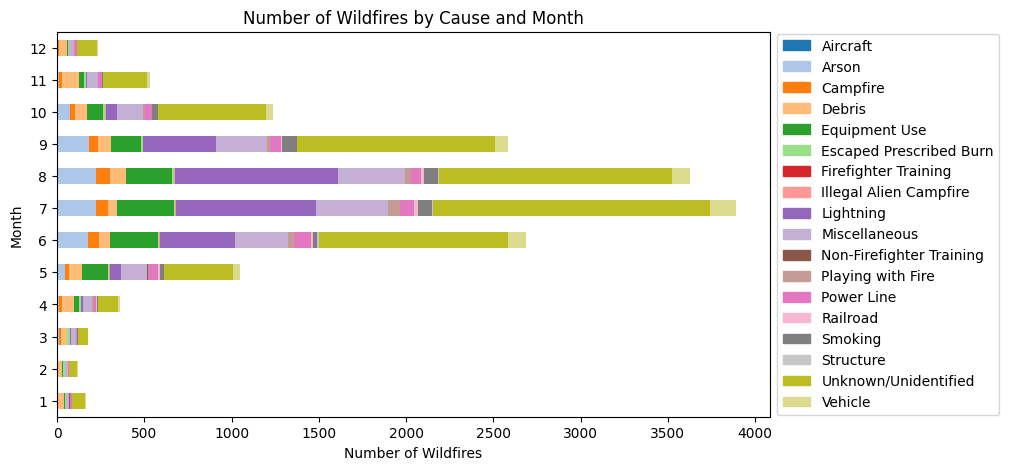

In [56]:
# Set the figure size
plt.figure(figsize=(22, 7))

# Define the category names
category_names = cause_monthly.columns

# Create a color palette with non-repeating colors
color_palette = sns.color_palette('tab20', len(category_names))

# Plot the DataFrame using the color palette
cause_monthly.plot.barh(stacked=True, figsize=(9.2, 5), color=color_palette)

# Set the plot title and labels
plt.title('Number of Wildfires by Cause and Month')
plt.xlabel('Number of Wildfires')
plt.ylabel('Month')

# Create a custom legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in color_palette]
plt.legend(handles, category_names, loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

- Beside Unknown cause, Lightning seems to be the main reason during "wildfire season" (Jun-Oct)

## 3.   Spatial Analysis

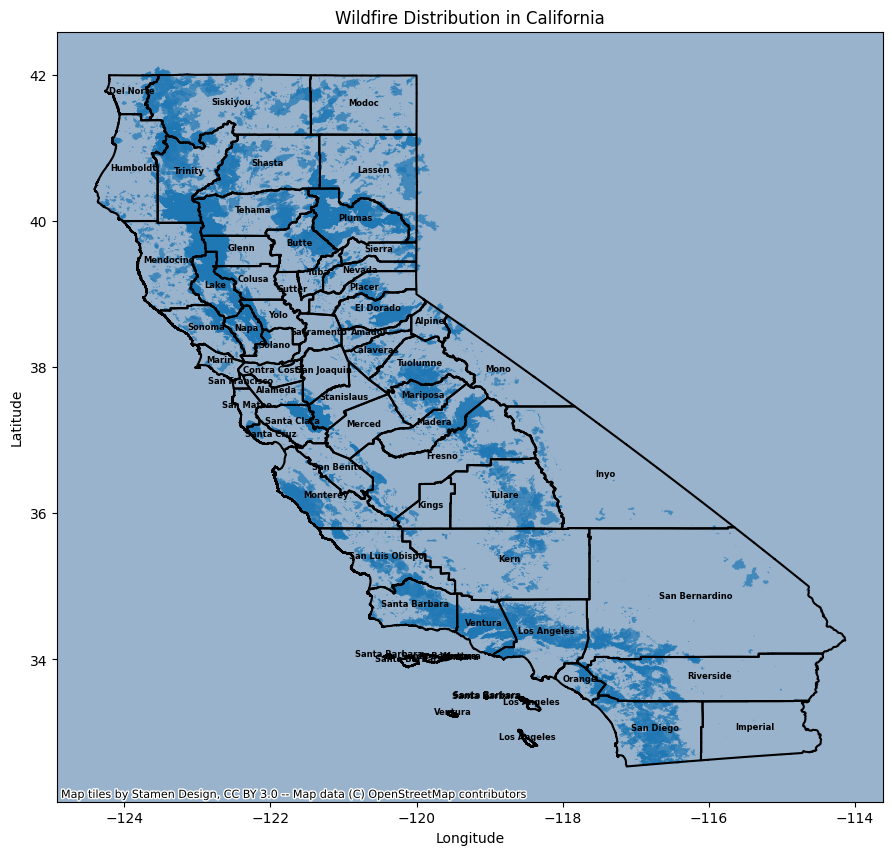

In [62]:
import contextily as ctx

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the county boundaries with county names
counties.boundary.plot(ax=ax, color='black')
counties['LABEL_POINT'] = counties['geometry'].centroid
for x, y, label in zip(counties['LABEL_POINT'].x, counties['LABEL_POINT'].y, counties['COUNTY_NAME']):
    ax.text(x, y, label, fontsize=6, fontweight='bold', ha='center')

# Plot the fires with circle markers based on burned acres
joined_gdf.plot(ax=ax, markersize=joined_gdf['BURNED_ACRES'] * 0.02, alpha=0.7)

# Add satellite imagery as the background
ctx.add_basemap(ax, source=ctx.providers.Stamen.Terrain)

# Set the title and axis labels
ax.set_title('Wildfire Distribution in California')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the map
plt.show()

- Wildfires have occurred mostly in Coastal Regions and Central Mountains because these areas tend to be very dry and windy.